In [1]:
#pip install datasets 
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset=load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df["job_skills"]=df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [2]:
df_DA_US = df[(df["job_title_short"]=="Data Analyst") & (df["job_country"]=="United States")].copy()

Text(0, 0.5, 'Number of Jobs')

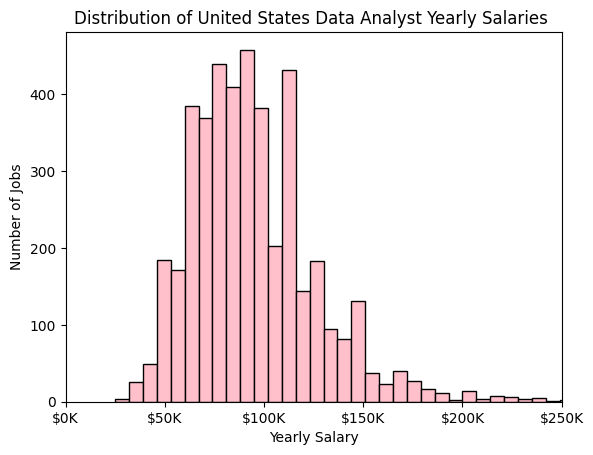

In [15]:
df_DA_US["salary_year_avg"].plot(kind="hist", bins=50, edgecolor="black", color="pink")
plt.xlim(0,250000)# Set x-axis limit

ax=plt.gca() # Get current axes
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f"${int(x/1000)}K")) # Format x-axis as currency

plt.title("Distribution of United States Data Analyst Yearly Salaries ")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")